In [2]:
%matplotlib ipympl
import json
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


# JSON files -> lists of dictionaries
with open('./uii_all_q_p.json') as json_file:
    uii_all_q_p = json.load(json_file)
    
with open('./uii_all_q.json') as json_file:
    uii_all_q = json.load(json_file)
    
with open('./uii_select_q_p.json') as json_file:
    uii_select_q_p = json.load(json_file)
    
with open('./uii_select_q.json') as json_file:
    uii_select_q = json.load(json_file)

In [3]:
# [{}] -> [[]] 

uii_data = []

for d in uii_all_q_p:   
    for x,y in d.items() :
        name = x
        f1_mean = y['f1_mean']
        roc_mean = y['roc_mean']
        precision_mean = y['precision_mean']
        recall_mean = y['recall_mean']
        uii_data.append(['uii_all_q_p', name,f1_mean, roc_mean, precision_mean, recall_mean])

for d in uii_all_q:   
    for x,y in d.items() :
        name = x
        f1_mean = y['f1_mean']
        roc_mean = y['roc_mean']
        precision_mean = y['precision_mean']
        recall_mean = y['recall_mean']
        uii_data.append(['uii_all_q', name,f1_mean, roc_mean, precision_mean, recall_mean])
        
for d in uii_select_q:   
    for x,y in d.items() :
        name = x
        f1_mean = y['f1_mean']
        roc_mean = y['roc_mean']
        precision_mean = y['precision_mean']
        recall_mean = y['recall_mean']
        uii_data.append(['uii_select_q', name,f1_mean, roc_mean, precision_mean, recall_mean])
        
for d in uii_select_q_p:   
    for x,y in d.items() :
        name = x
        f1_mean = y['f1_mean']
        roc_mean = y['roc_mean']
        precision_mean = y['precision_mean']
        recall_mean = y['recall_mean']
        uii_data.append(['uii_select_q_p', name,f1_mean, roc_mean, precision_mean, recall_mean])

In [4]:
# [[]] -> dataframe
df_uii_data = pd.DataFrame(uii_data, columns=['QuestionSet', 'Model', 'f1', 'roc_auc', 'precision', 'recall'])

In [5]:
df_uii_data['precision'].describe()

count    264.000000
mean       0.179940
std        0.118188
min        0.000000
25%        0.108333
50%        0.174867
75%        0.245499
max        0.523333
Name: precision, dtype: float64

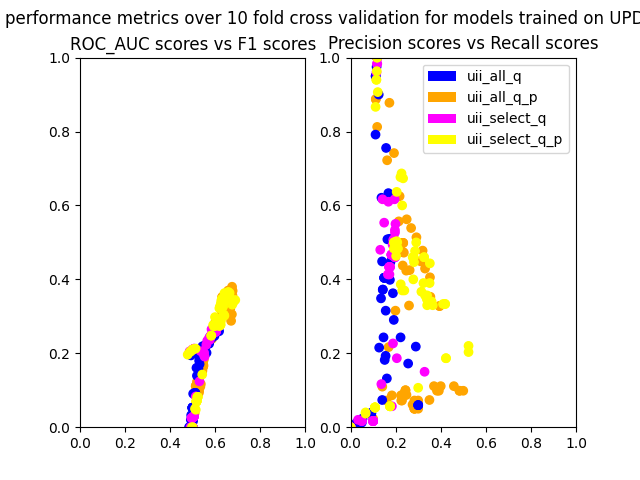

In [6]:
# UPDRS I plot

colors = {'uii_all_q':'blue', 'uii_all_q_p':'orange', 'uii_select_q':'magenta', 'uii_select_q_p':'yellow'}

fig = plt.figure()
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# plot 1
ax.set_title("ROC_AUC scores vs F1 scores")
ax.scatter(df_uii_data['roc_auc'], df_uii_data['f1'], c=df_uii_data['QuestionSet'].map(colors), label=['uii_all_q','uii_all_q_p'])
ax.set_xlim([0,1])
ax.set_ylim([0,1])


# plot 2
ax2.set_title("Precision scores vs Recall scores")
ax2.scatter(df_uii_data['precision'], df_uii_data['recall'], c=df_uii_data['QuestionSet'].map(colors))
ax2.set_xlim([0,1])
ax2.set_ylim([0,1])

classes = ['uii_all_q','uii_all_q_p', 'uii_select_q', 'uii_select_q_p']
class_colours = ['blue','orange','magenta','yellow']
recs = []
for i in range(0,len(class_colours)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
ax2.legend(recs,classes,loc=1)

plt.suptitle("Averaged performance metrics over 10 fold cross validation for models trained on UPDRS I data")
plt.show()

In [8]:
df_uii_data.query("roc_auc > 0.65 and precision > 0.3")

# General Observations for UPDRS I:
# Nothing worth getting excited about
# + PREV_SIGFALL out performs w/o


,QuestionSet,Model,f1,roc_auc,precision,recall
23,uii_all_q_p,QDA6,0.380016,0.674466,0.319578,0.477778
24,uii_all_q_p,QDA7,0.368805,0.660268,0.330487,0.429167
25,uii_all_q_p,QDA8,0.369615,0.657009,0.352242,0.405556
28,uii_all_q_p,SVM2,0.364687,0.661445,0.311876,0.448611
208,uii_select_q_p,LDA2,0.365991,0.657642,0.351746,0.443333
